In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = 'Plast_test'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.4,0.4     # offset in nA
                                               ,0.2,0.2 # amplitude in nA
                                               ,2,20   # frequency in Hz
                                              ],5000,namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')



Noise input is of type double sine
Data is saved


[0.000000e+00 2.500000e-05 5.000000e-05 ... 4.999925e+00 4.999950e+00
 4.999975e+00]
[[4.00000000e-10 4.00062832e-10 4.00125664e-10 ... 3.99811504e-10
  3.99874336e-10 3.99937168e-10]
 [4.00000000e-10 4.00628319e-10 4.01256634e-10 ... 3.98115088e-10
  3.98743378e-10 3.99371685e-10]]


<IPython.core.display.Javascript object>


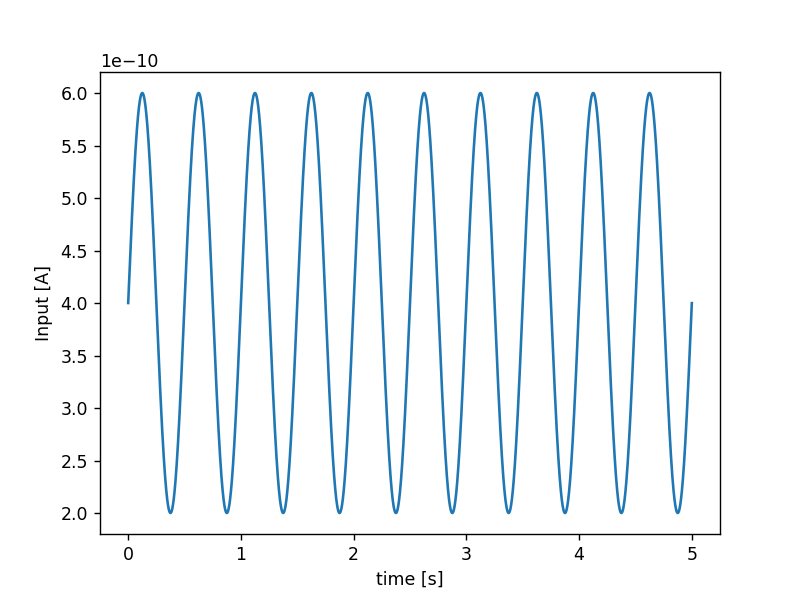

Text(0, 0.5, 'Input [A]')

In [3]:
%matplotlib notebook

print(Noise_t)
print(Noise_I)
plt.figure()
plt.plot(Noise_t,Noise_I[0])
plt.xlabel('time [s]')
plt.ylabel('Input [A]')

In [4]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})

In [5]:
#from E_Synapses_NoPlasticity import *
from E_Synapses_Plasticity import *
#visualise(S_Coupled_noSTDP)

loading went fine


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


A_PC= 0.0002
nr of noise is 2
final static weights STDP [0.52631579 0.47368421 0.47058824 0.46666667 0.46153846 0.45454545
 0.44444444 0.42857143 0.4        0.33333333 0.47368421 0.52631579
 0.52941176 0.53333333 0.53846154 0.54545455 0.55555556 0.57142857
 0.6        0.66666667]
new weights <dummy_Coupled.weight: array([0.52631579, 0.47368421, 0.47058824, 0.46666667, 0.46153846,
       0.45454545, 0.44444444, 0.42857143, 0.4       , 0.33333333,
       0.47368421, 0.52631579, 0.52941176, 0.53333333, 0.53846154,
       0.54545455, 0.55555556, 0.57142857, 0.6       , 0.66666667])>
final static weights uncoupled STDP [0.52631579 0.47368421 0.47058824 0.46666667 0.46153846 0.45454545
 0.44444444 0.42857143 0.4        0.33333333 0.47368421 0.52631579
 0.52941176 0.53333333 0.53846154 0.54545455 0.55555556 0.57142857
 0.6        0.66666667]


In [6]:
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 5. s
0.391625 (7%) simulated in 10s, estimated 1m 58s remaining.
0.7899500000000002 (15%) simulated in 20s, estimated 1m 47s remaining.
1.179125 (23%) simulated in 30s, estimated 1m 37s remaining.
1.578575 (31%) simulated in 40s, estimated 1m 27s remaining.
1.9719 (39%) simulated in 50s, estimated 1m 17s remaining.
2.3827000000000003 (47%) simulated in 1m 0s, estimated 1m 6s remaining.
2.79385 (55%) simulated in 1m 10s, estimated 55s remaining.
3.17875 (63%) simulated in 1m 20s, estimated 46s remaining.
3.5498000000000003 (70%) simulated in 1m 30s, estimated 37s remaining.
3.91635 (78%) simulated in 1m 40s, estimated 28s remaining.
4.257975 (85%) simulated in 1m 50s, estimated 19s remaining.
4.633575 (92%) simulated in 2m 0s, estimated 9s remaining.
5.0 (100%) simulated in 2m 9s


In [7]:
#run(exp_runtime,report='text')

<IPython.core.display.Javascript object>


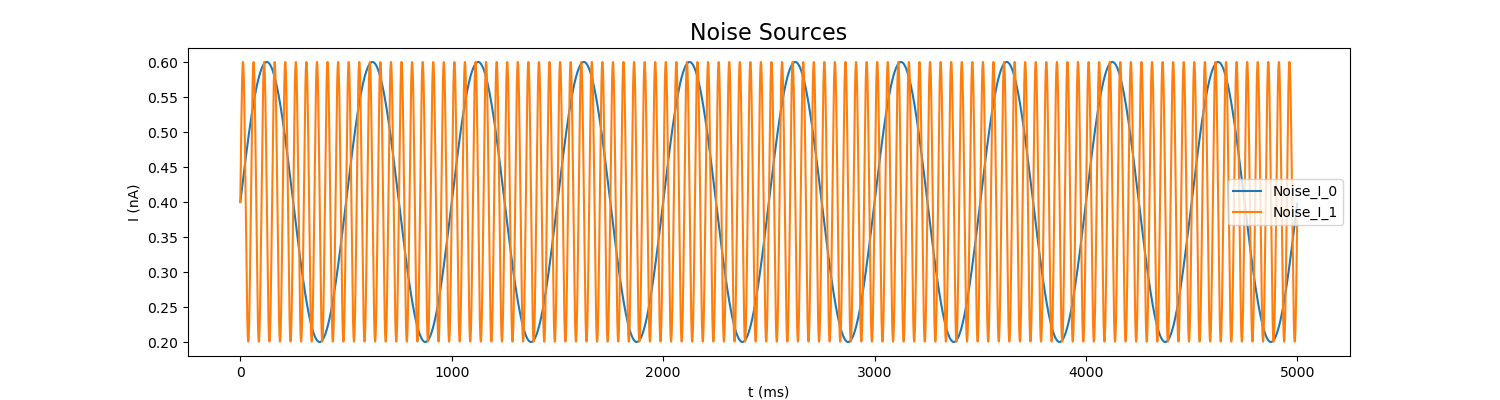

Plasticity


<IPython.core.display.Javascript object>


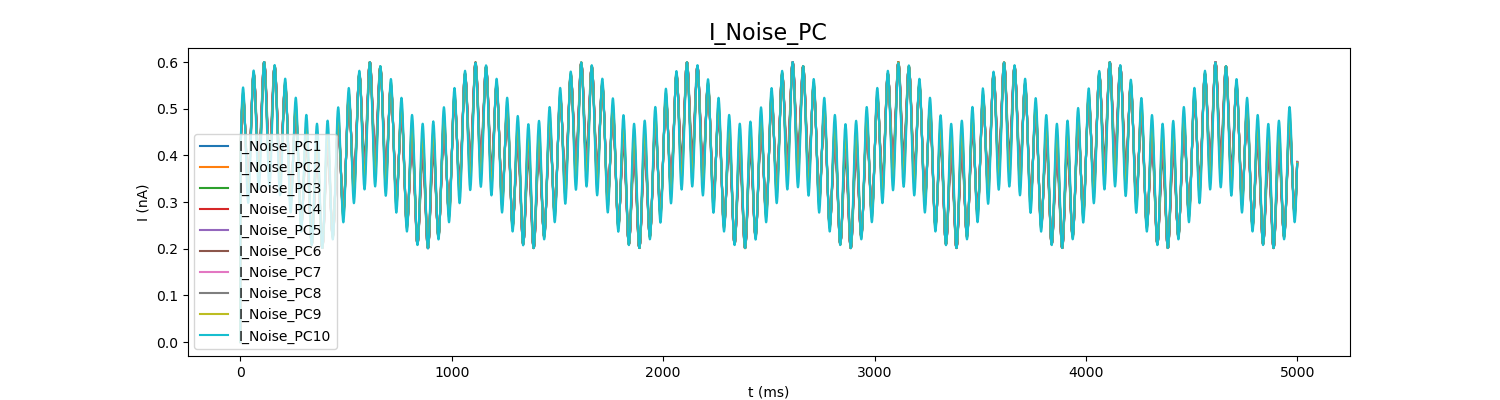

Plasticity Coupled Scenario


<IPython.core.display.Javascript object>


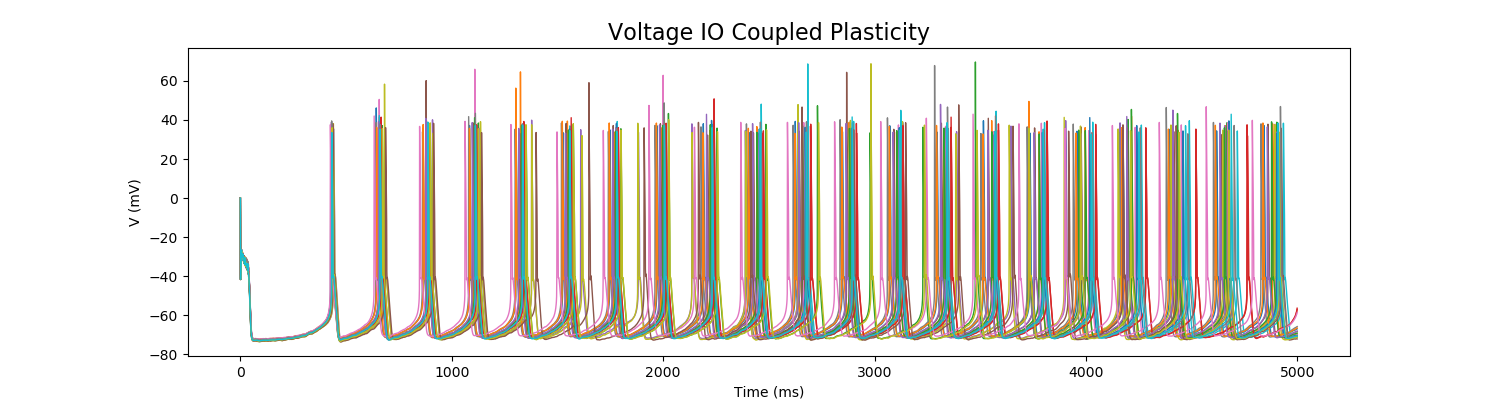

Number of spikes DCN: 150
Number of spikes DCN: 194
Number of spikes DCN: 160
Number of spikes DCN: 167
Number of spikes DCN: 156
Number of spikes DCN: 165
Number of spikes DCN: 176
Number of spikes DCN: 182
Number of spikes DCN: 148
Number of spikes DCN: 164


<IPython.core.display.Javascript object>


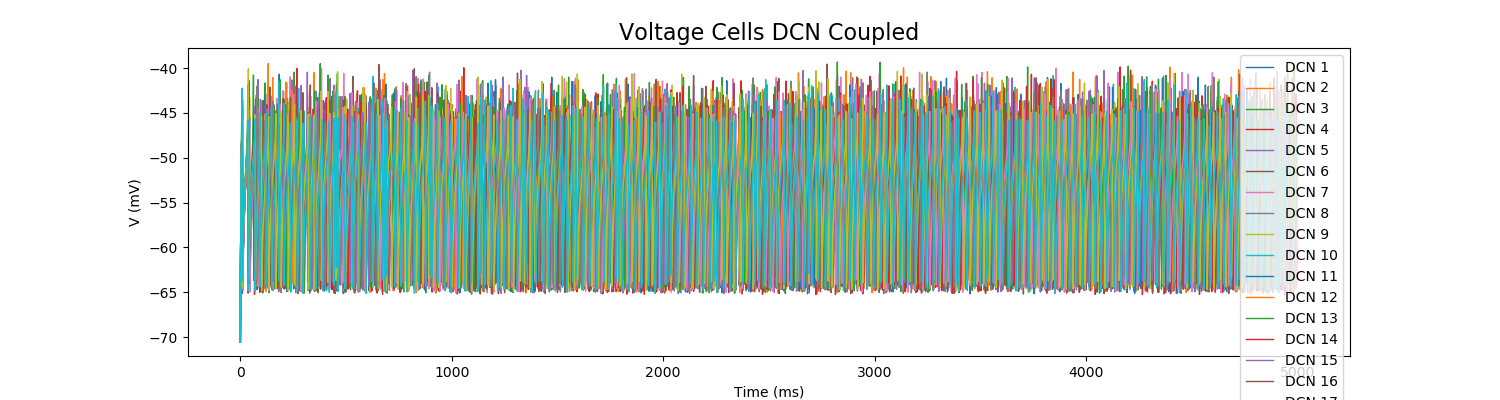

<IPython.core.display.Javascript object>


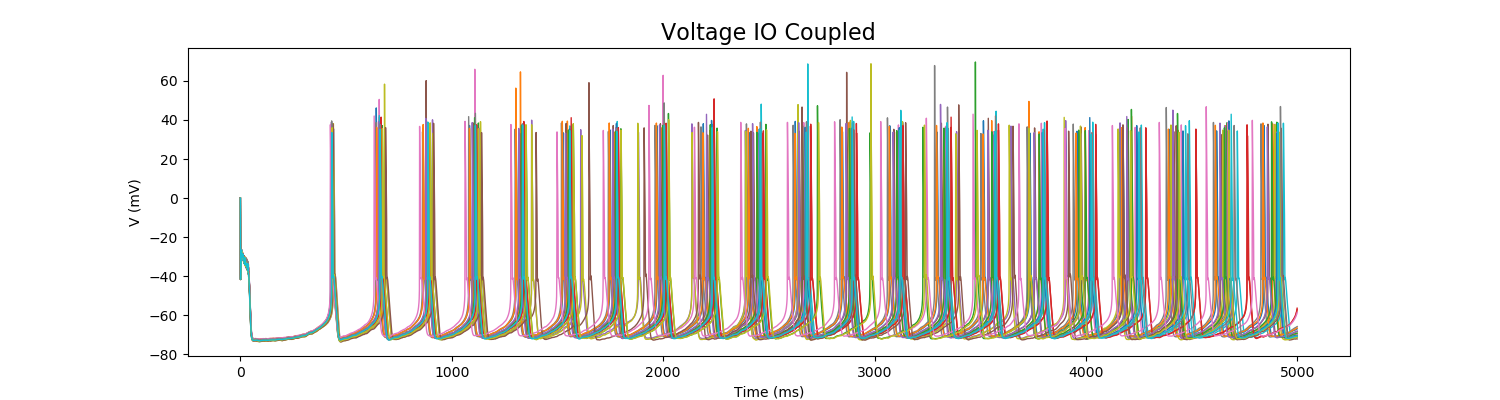

<IPython.core.display.Javascript object>


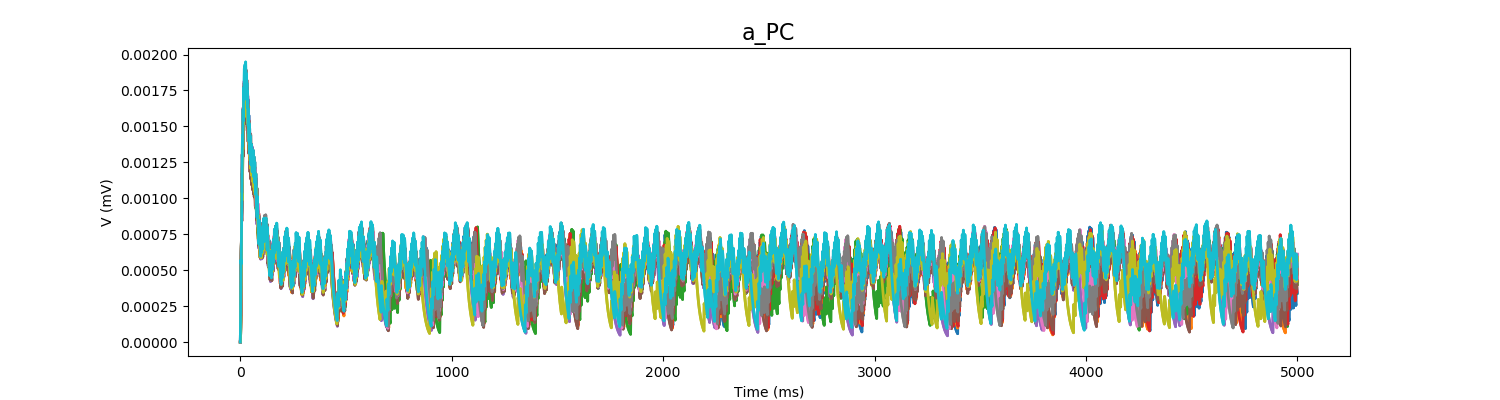

<IPython.core.display.Javascript object>


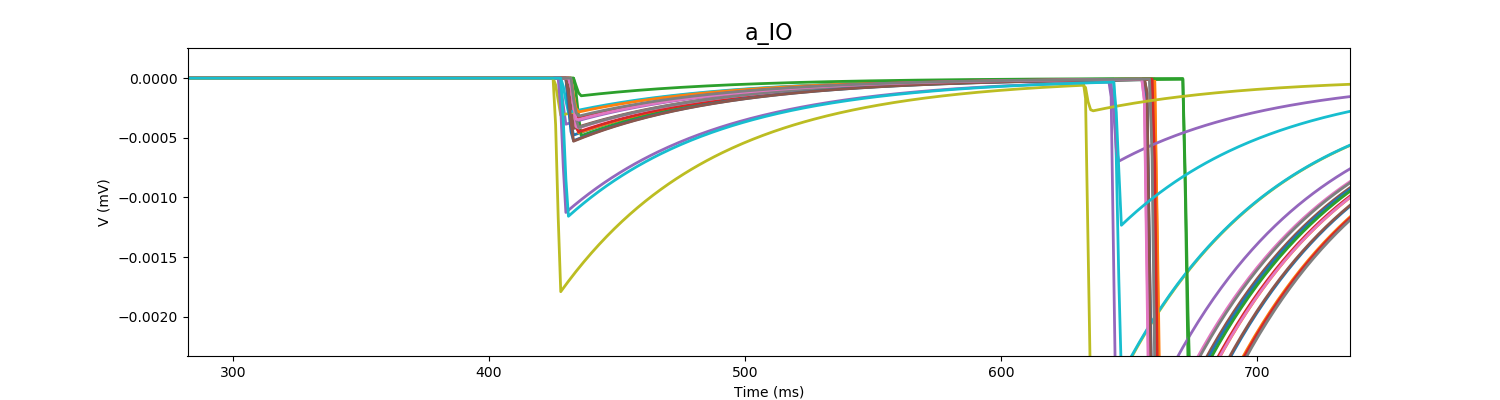

<IPython.core.display.Javascript object>


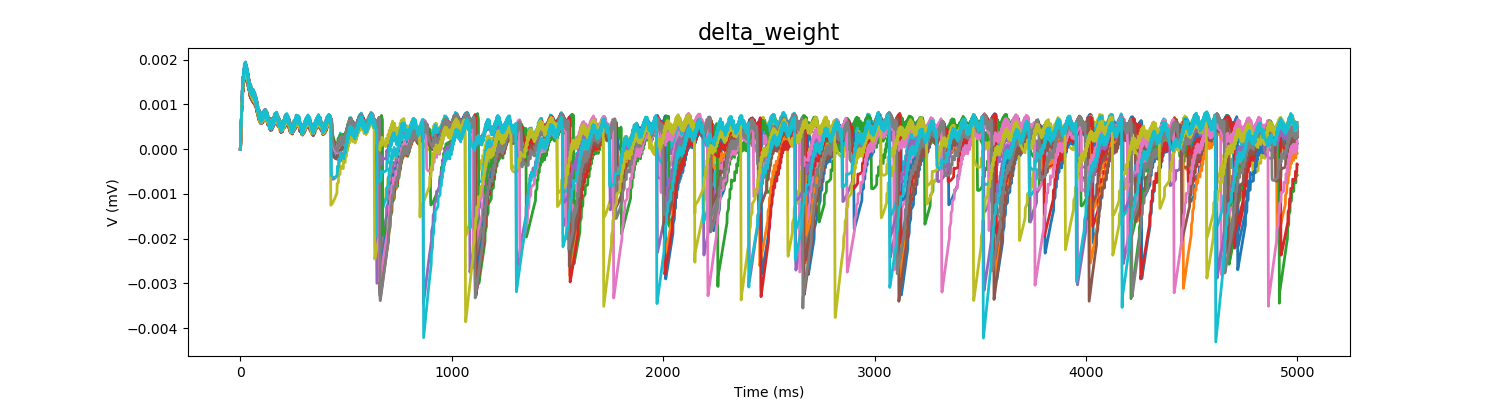

Plasticity Uncoupled Scenario


<IPython.core.display.Javascript object>


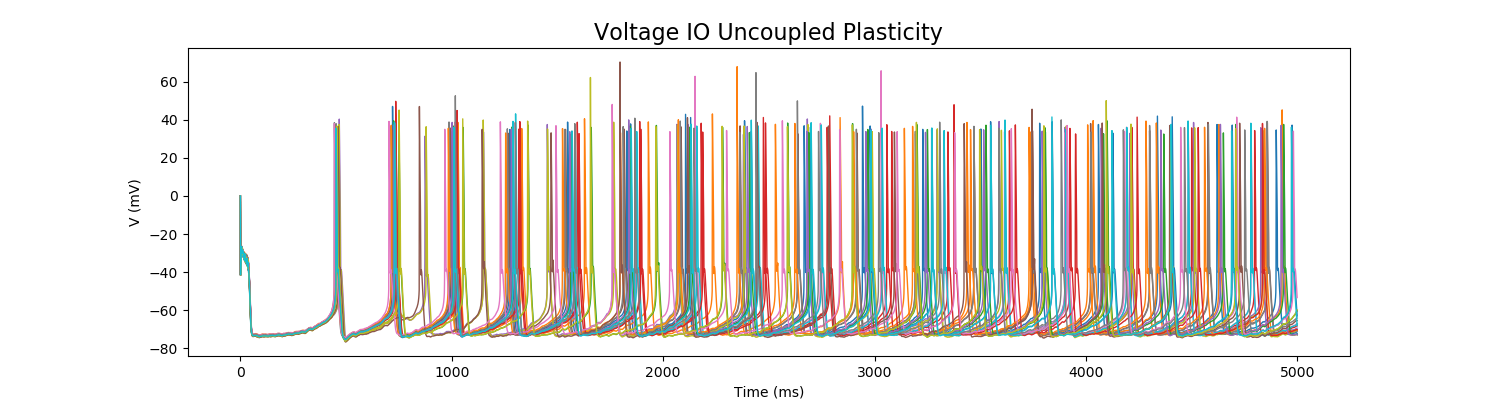

Number of spikes DCN: 148
Number of spikes DCN: 189
Number of spikes DCN: 155
Number of spikes DCN: 162
Number of spikes DCN: 149
Number of spikes DCN: 165
Number of spikes DCN: 173
Number of spikes DCN: 178
Number of spikes DCN: 146
Number of spikes DCN: 161


<IPython.core.display.Javascript object>


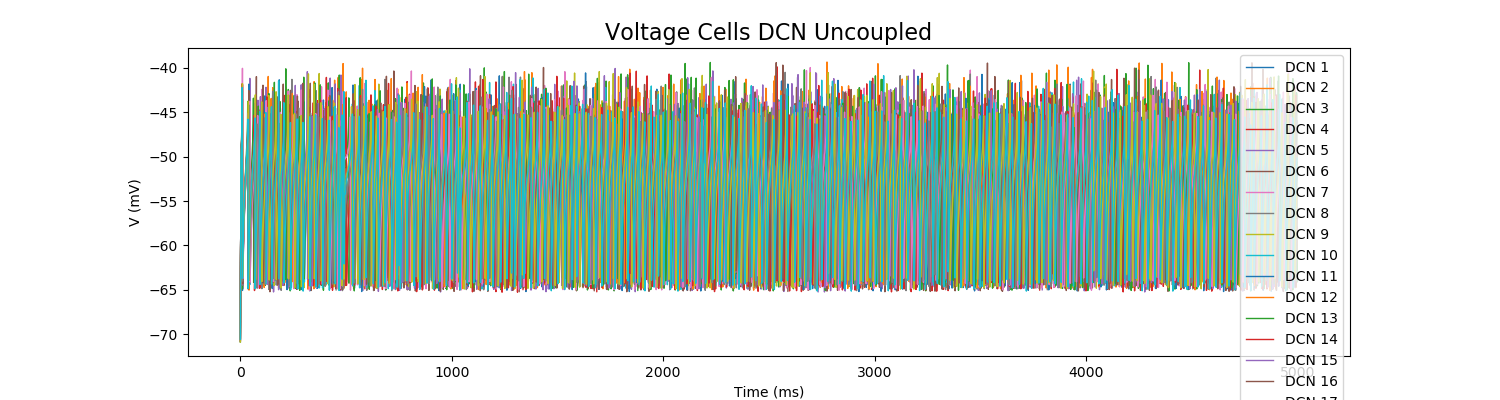

<IPython.core.display.Javascript object>


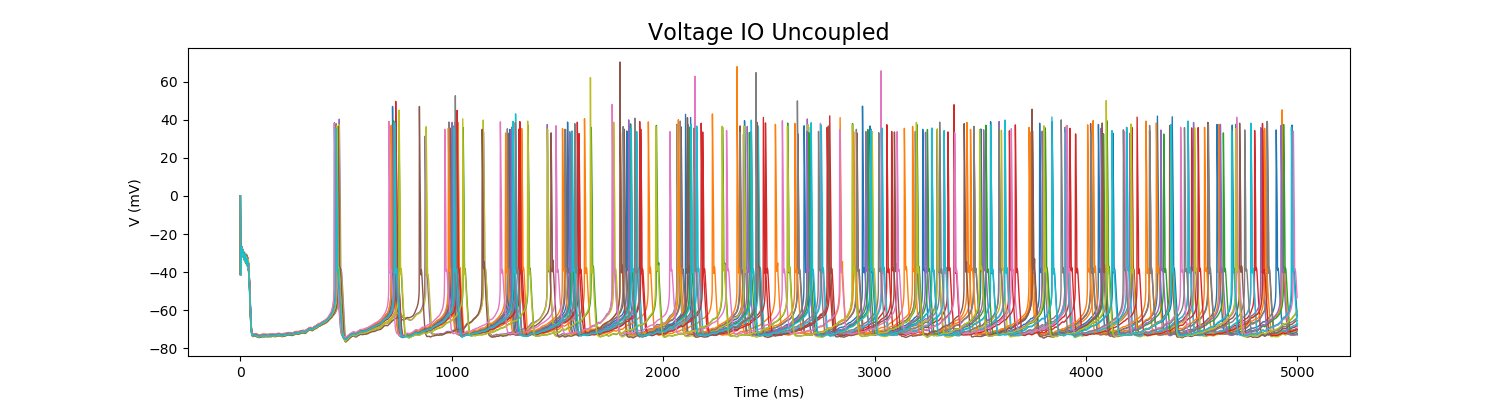

<IPython.core.display.Javascript object>


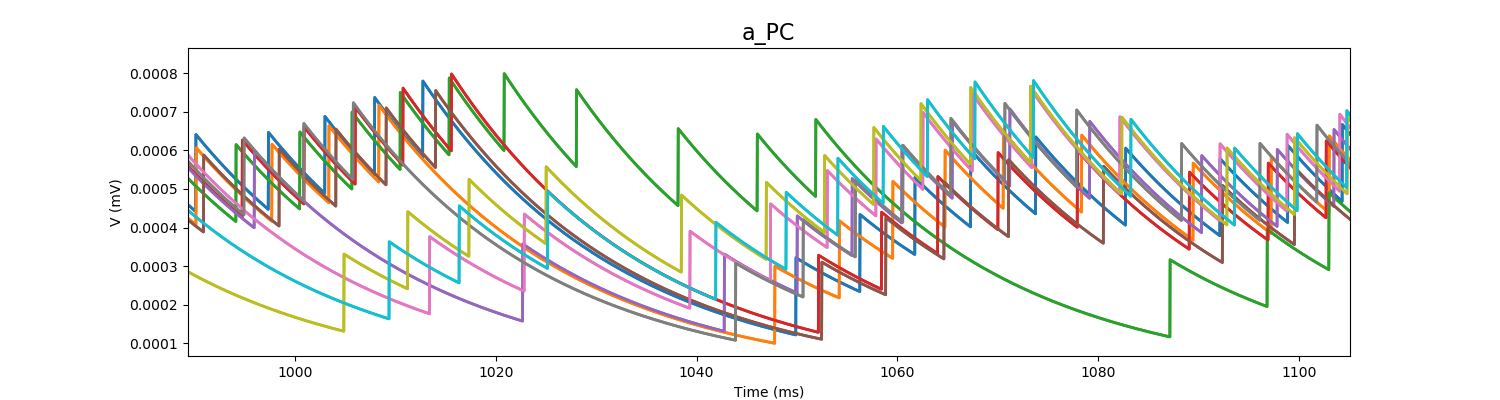

<IPython.core.display.Javascript object>


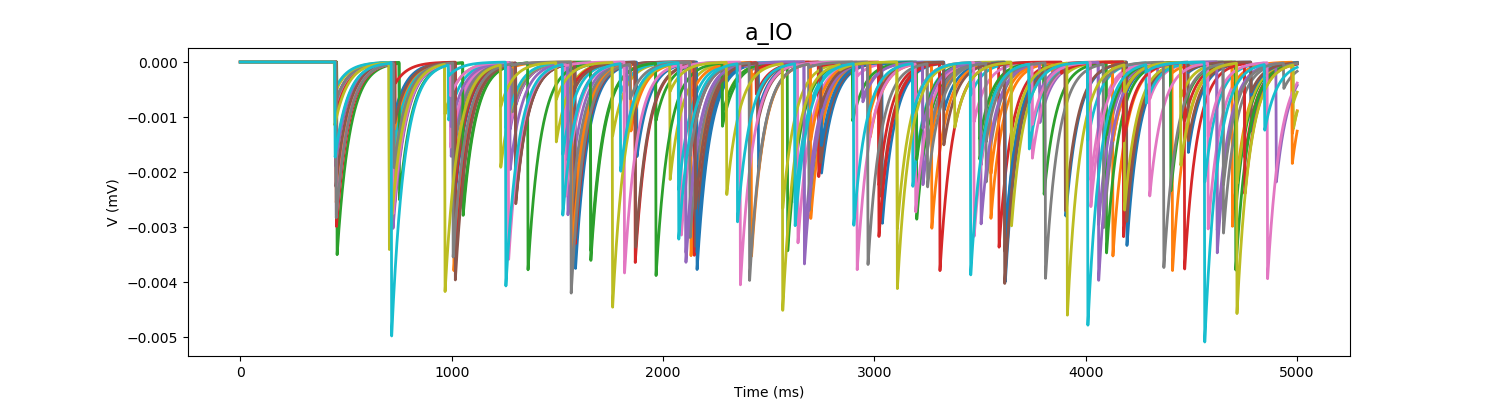

<IPython.core.display.Javascript object>


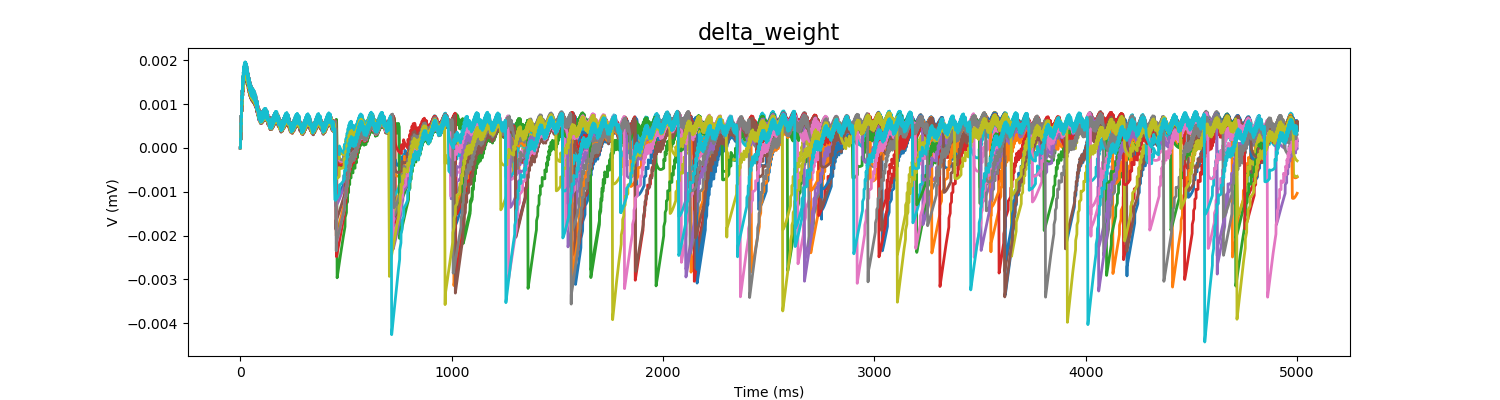

In [8]:
from G_Plot_Plasticity import *

In [9]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved


In [10]:
#run(exp_runtime,report='text')

In [11]:
#from G_Plot_Plasticity import *

<IPython.core.display.Javascript object>


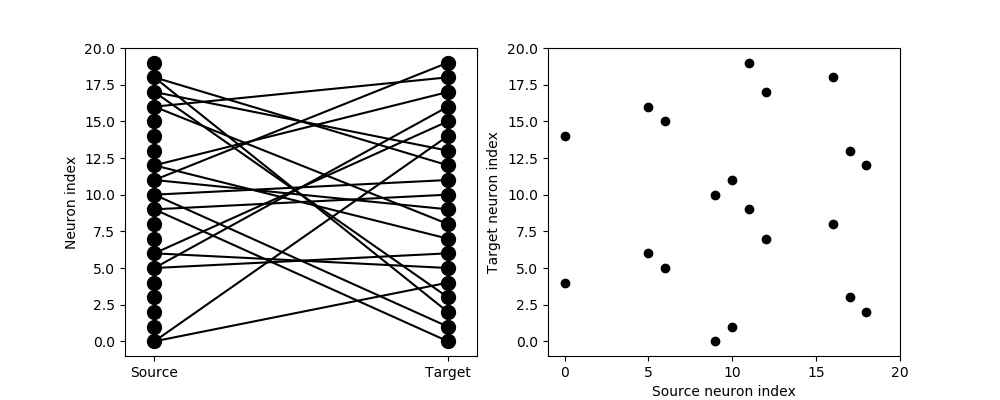

<IPython.core.display.Javascript object>


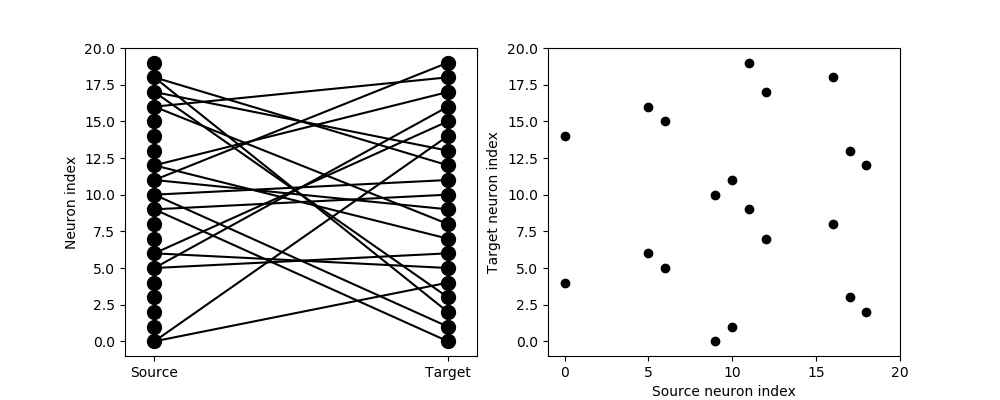

<IPython.core.display.Javascript object>


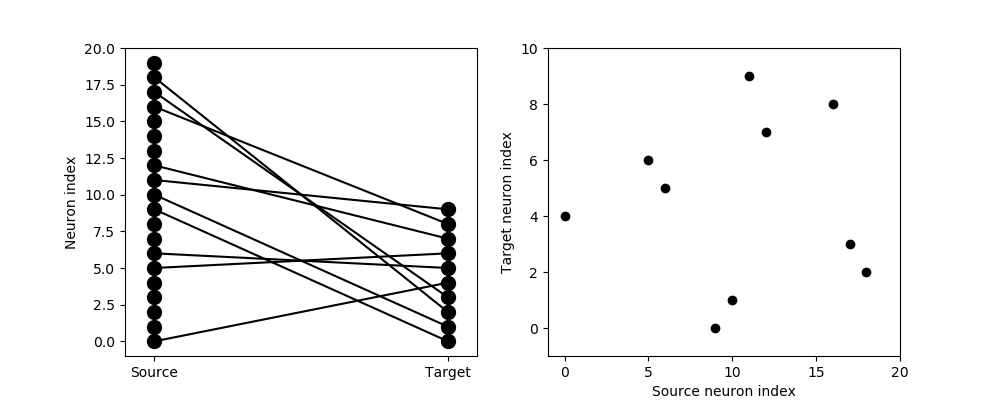

<IPython.core.display.Javascript object>


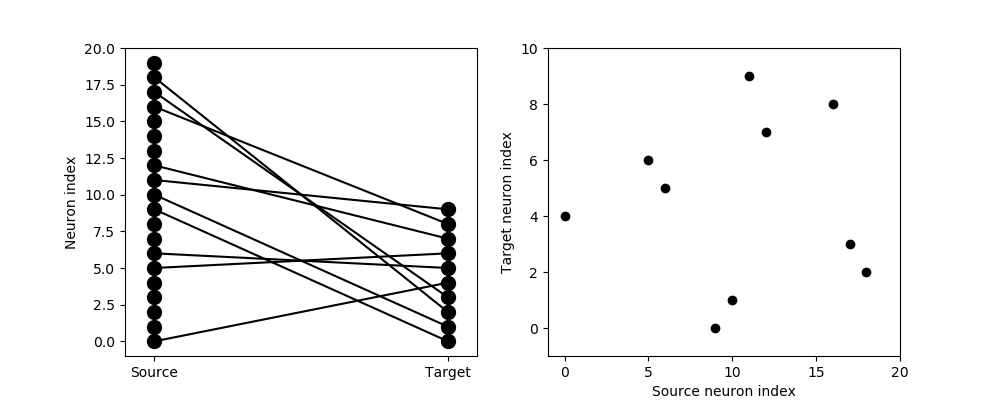

<IPython.core.display.Javascript object>


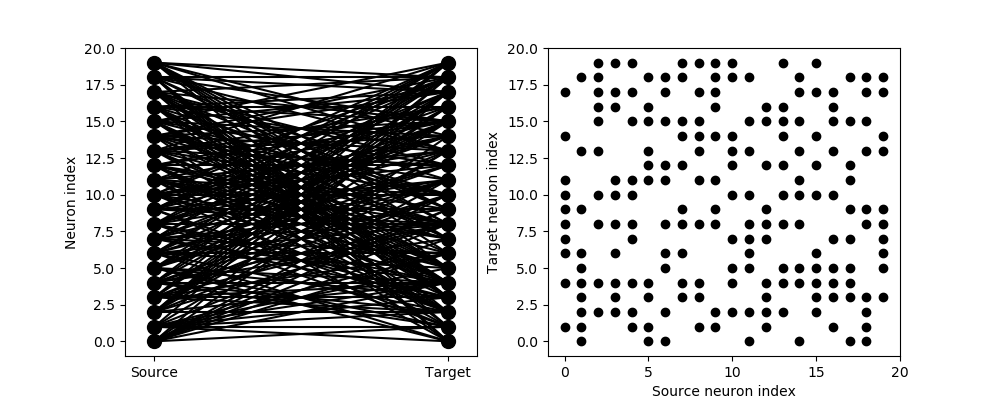

WARNING    C:\Users\thoed\OneDrive\Documenten\Universiteit_Delft\master\TheModelPlasticity\ModelPlasticity\A_Functions.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
 [py.warnings]


<IPython.core.display.Javascript object>


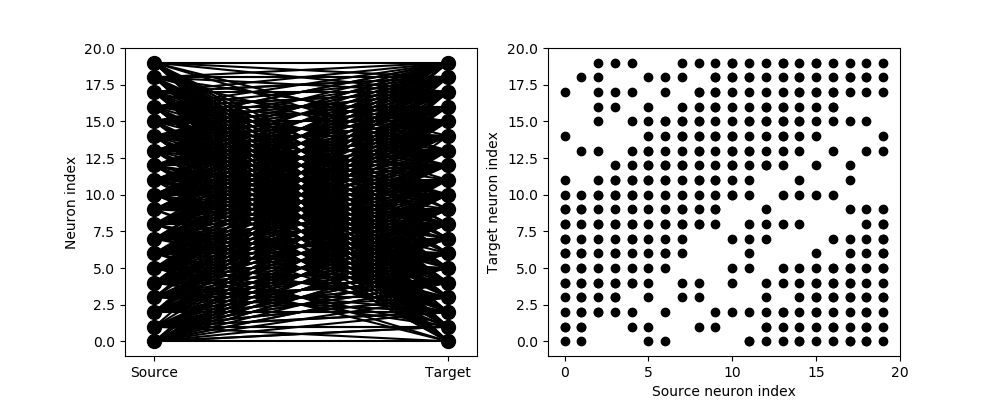

<IPython.core.display.Javascript object>


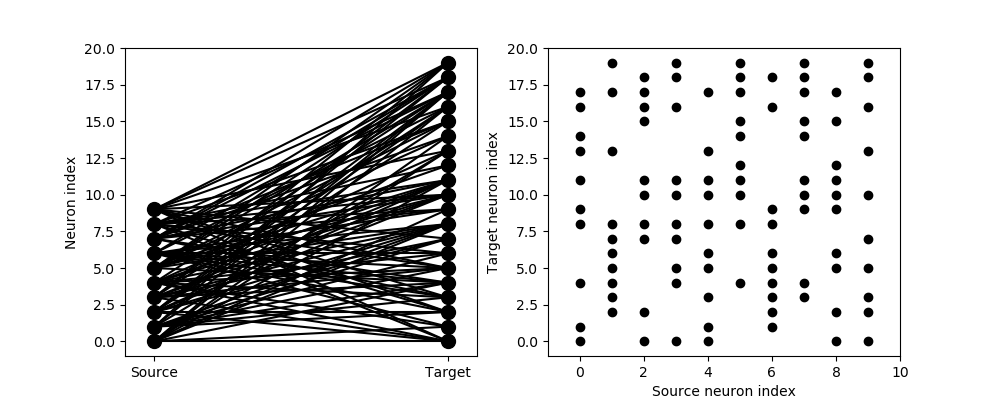

<IPython.core.display.Javascript object>


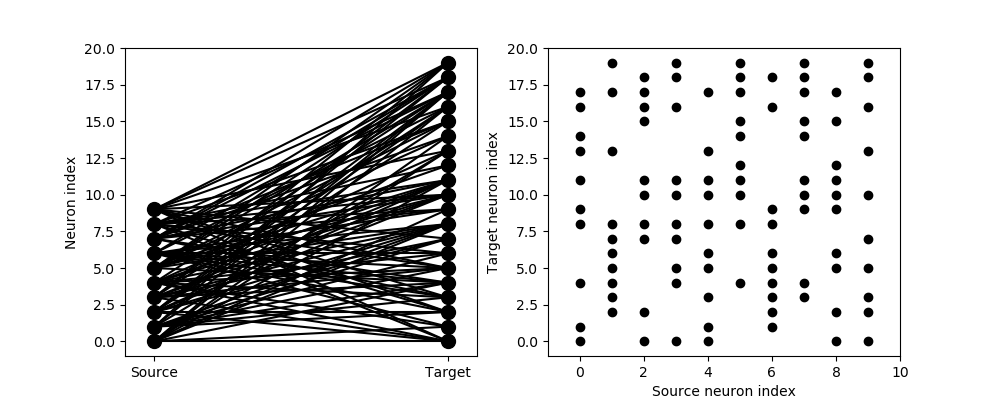

In [12]:
visualise(S_IO_N_Coupled)
visualise(S_IO_N_Uncoupled)

#visualise(Synapse_IO_PC_Coupled_noSTDP)
#visualise(Synapse_IO_PC_Uncoupled_noSTDP)
visualise(Synapse_IO_PC_Coupled_STDP)
visualise(Synapse_IO_PC_Uncoupled_STDP)

#visualise(IO_DCN_Synapse_Coupled_noSTDP)
#visualise(IO_DCN_Synapse_Uncoupled_noSTDP)
visualise(IO_DCN_Synapse_Coupled_STDP)
visualise(IO_DCN_Synapse_Uncoupled_STDP)

#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTDP)
visualise(DCN_PC_Synapse_Coupled_STDP)
visualise(DCN_PC_Synapse_Uncoupled_STDP)